## Hypothesis 8
H0: The earth region of the location has no effect on the longwave radiation

Ha: Tropical locations have higher longwave radiation than temperate locations

In [ ]:
!pip install rioxarray
!pip install nc-time-axis

import netCDF4 as nc
import rioxarray
import matplotlib.pyplot as plt
import xarray as xr
import cftime
import nc_time_axis

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
radiation_file = '/content/drive/MyDrive/Colab Notebooks/Data/olr.mon.ltm.1981-2010.nc'
radiation_dataset = nc.Dataset(radiation_file, mode='r')
print(radiation_dataset)
print(radiation_dataset.variables.keys())

In [ ]:
#open netCDF file with rioxarray
xr = rioxarray.open_rasterio(radiation_file)

#xr.attrs['units'] = 'Standardized Units of Relative Dry and Wet'
xr = xr[1]
xr.attrs

In [40]:
#Get data from Tropical locations

ds_corpus_radiation = xr.sel(x=263.25, y=28.25, method="nearest")
ds_villahermosa_radiation = xr.sel(x=268.25, y=18.25, method="nearest")
ds_puerto_escondido_radiation = xr.sel(x=262.41, y=16.41, method="nearest")


In [19]:
#Get data from Temperate locations
ds_new_york_radiation = xr.sel(x=285.0, y=40.0, method="nearest")
ds_siberia_radiation = xr.sel(x=137.41, y=63.41, method="nearest")
ds_seattle_radiation = xr.sel(x=237.5, y=40.0, method="nearest")

In [20]:
#Convert to dataframe

df_corpus_radiation = ds_corpus_radiation.to_dataframe()
df_corpus_radiation = df_corpus_radiation.reset_index()

df_villahermosa_radiation = ds_villahermosa_radiation.to_dataframe()
df_villahermosa_radiation = df_villahermosa_radiation.reset_index()

df_puerto_escondido_radiation = ds_puerto_escondido_radiation.to_dataframe()
df_puerto_escondido_radiation = df_puerto_escondido_radiation.reset_index()

df_new_york_radiation = ds_new_york_radiation.to_dataframe()
df_new_york_radiation = df_new_york_radiation.reset_index()

df_siberia_radiation = ds_siberia_radiation.to_dataframe()
df_siberia_radiation = df_siberia_radiation.reset_index()

df_seattle_radiation = ds_seattle_radiation.to_dataframe()
df_seattle_radiation = df_seattle_radiation.reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


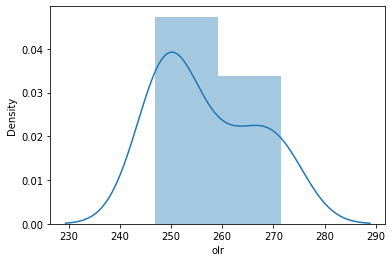

In [43]:
import seaborn as sns

sns.distplot(df_corpus_radiation['olr'])
plt.show()